Before running analysis, I cleaned the data in sql and OpenRefine.

I parsed all the specimen citations discovered using the ner model into separate rows with the same publication metadata. I removed false positives. And I joined the specimen data with the bibliography of our publications to gain insights from the journals, publication date, etc.

I then transformed the cleaned results into more specific analytics in sql, exported the results, and illustrated the results here in matplotlib.

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [2]:
specimen_frequency = pd.read_csv ('specimen_frequency.csv')
specimen_frequency

,specimen_prediction,Frequency
0,USNM 10923,27
1,MUSM 1443,17
2,GMNH 27372,17
3,USNM 221034,14
4,GMNH 27375,13
...,...,...
2911,YPM 5205,1
2912,YPM 5226,1
2913,YPM 72083,1
2914,ZMB 220002,1


In [3]:
specimen_frequency.shape

(2916, 2)

In [4]:
top_specimen_frequency = pd.read_csv ('top_specimen_frequency.csv')
top_specimen_frequency

,specimen_prediction,Frequency
0,USNM 10923,27
1,GMNH 27372,17
2,MUSM 1443,17
3,USNM 221034,14
4,GMNH 27375,13
5,NCSM 13170,12
6,MVZ 171485,9
7,UCMP 194914,9
8,USNM 1133657,9
9,USNM 860699,9


In [5]:
sns.set(rc={'figure.figsize':(12,9)})

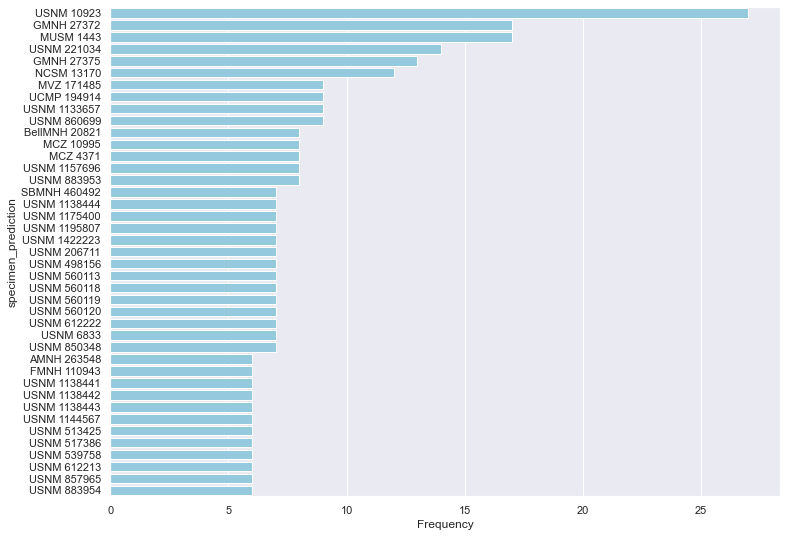

In [42]:
sns.set(rc={'figure.figsize':(12,9)})
sns.barplot(data=top_specimen_frequency, y='specimen_prediction', x='Frequency', color='skyblue')
plt.savefig("top_specimen_frequency")

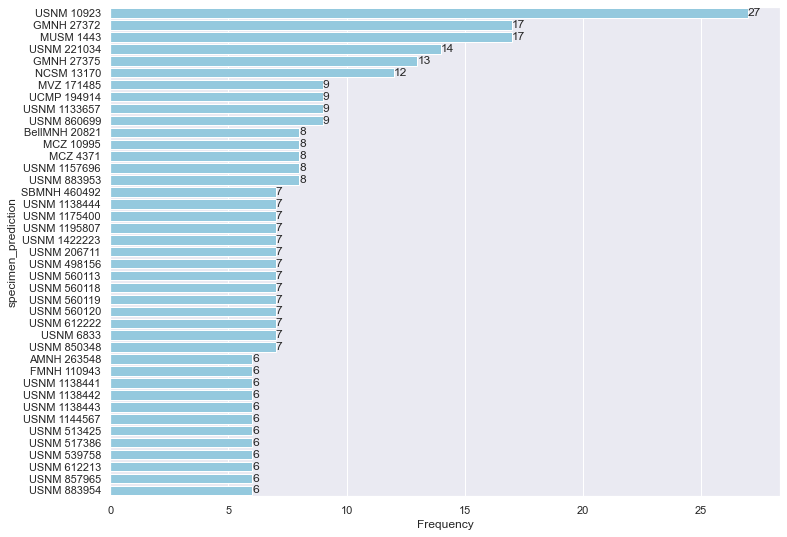

In [43]:
ax = sns.barplot(data=top_specimen_frequency, y='specimen_prediction', x='Frequency', color='skyblue')
ax.bar_label(ax.containers[0])
plt.savefig("top_specimen_frequency")

In [18]:
ummz_specimen_frequency = pd.read_csv ('ummz_specimen_frequencyy.csv')
ummz_specimen_frequency

,specimen_prediction,Frequency
0,UMMZ 176563,5
1,UMMZ 76732,4
2,UMMZ 125456,4
3,UMMZ 133844,2
4,UMMZ 155836,2
...,...,...
58,UMMZ 118343,1
59,UMMZ 118632,1
60,UMMZ 12 10 I,1
61,UMMZ 123353,1


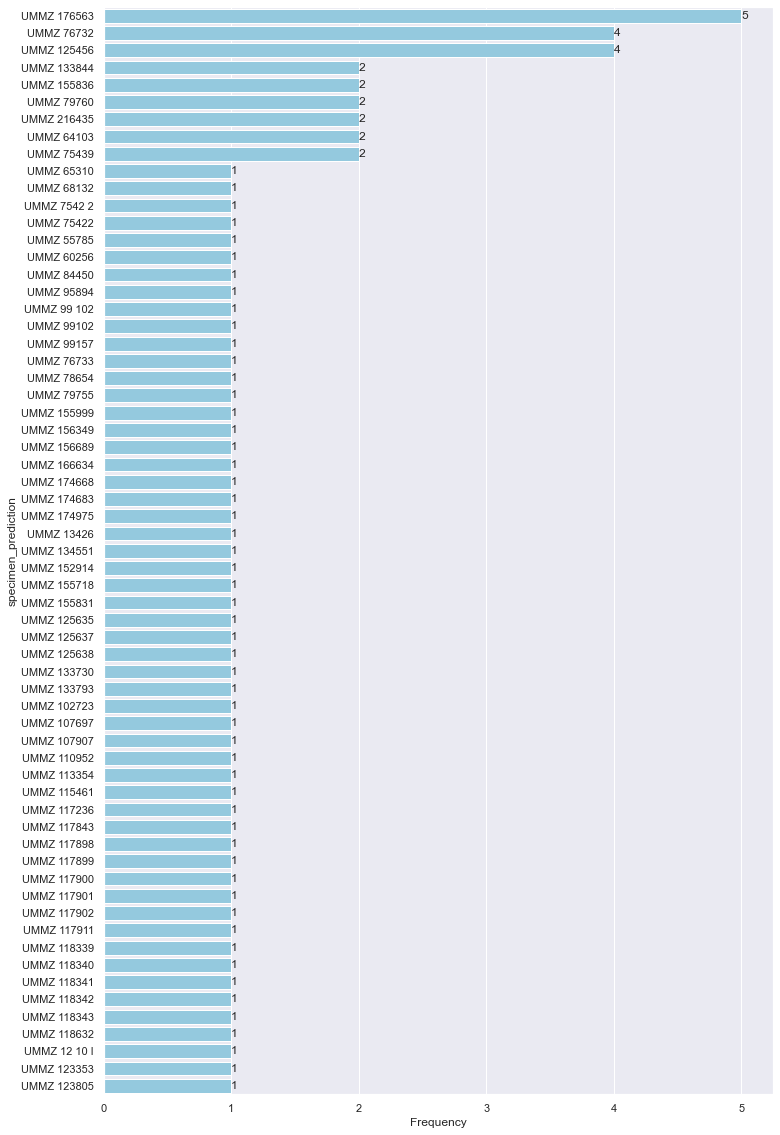

In [44]:
sns.set(rc={'figure.figsize':(12,20)})
ax = sns.barplot(data=ummz_specimen_frequency, y='specimen_prediction', x='Frequency', color='skyblue')
ax.bar_label(ax.containers[0])
plt.savefig("ummz_specimen_frequency")

In [26]:
top_frequency_by_paper = pd.read_csv ('top_frequency_by_paper.csv')
top_frequency_by_paper

,doi,Frequency
0,10.3897/zookeys.158.1910,269
1,10.3897/zookeys.79.1045,155
2,10.3897/zookeys.330.5852,144
3,10.1002/jmor.10858,133
4,10.11646/zootaxa.3994.4.1,120
5,10.1206/351.1,115
6,10.3897/zookeys.324.5827,111
7,10.1206/322.1,98
8,10.1016/j.palaeo.2015.10.001,88
9,10.1111/j.1096-3642.2009.00588.x,79


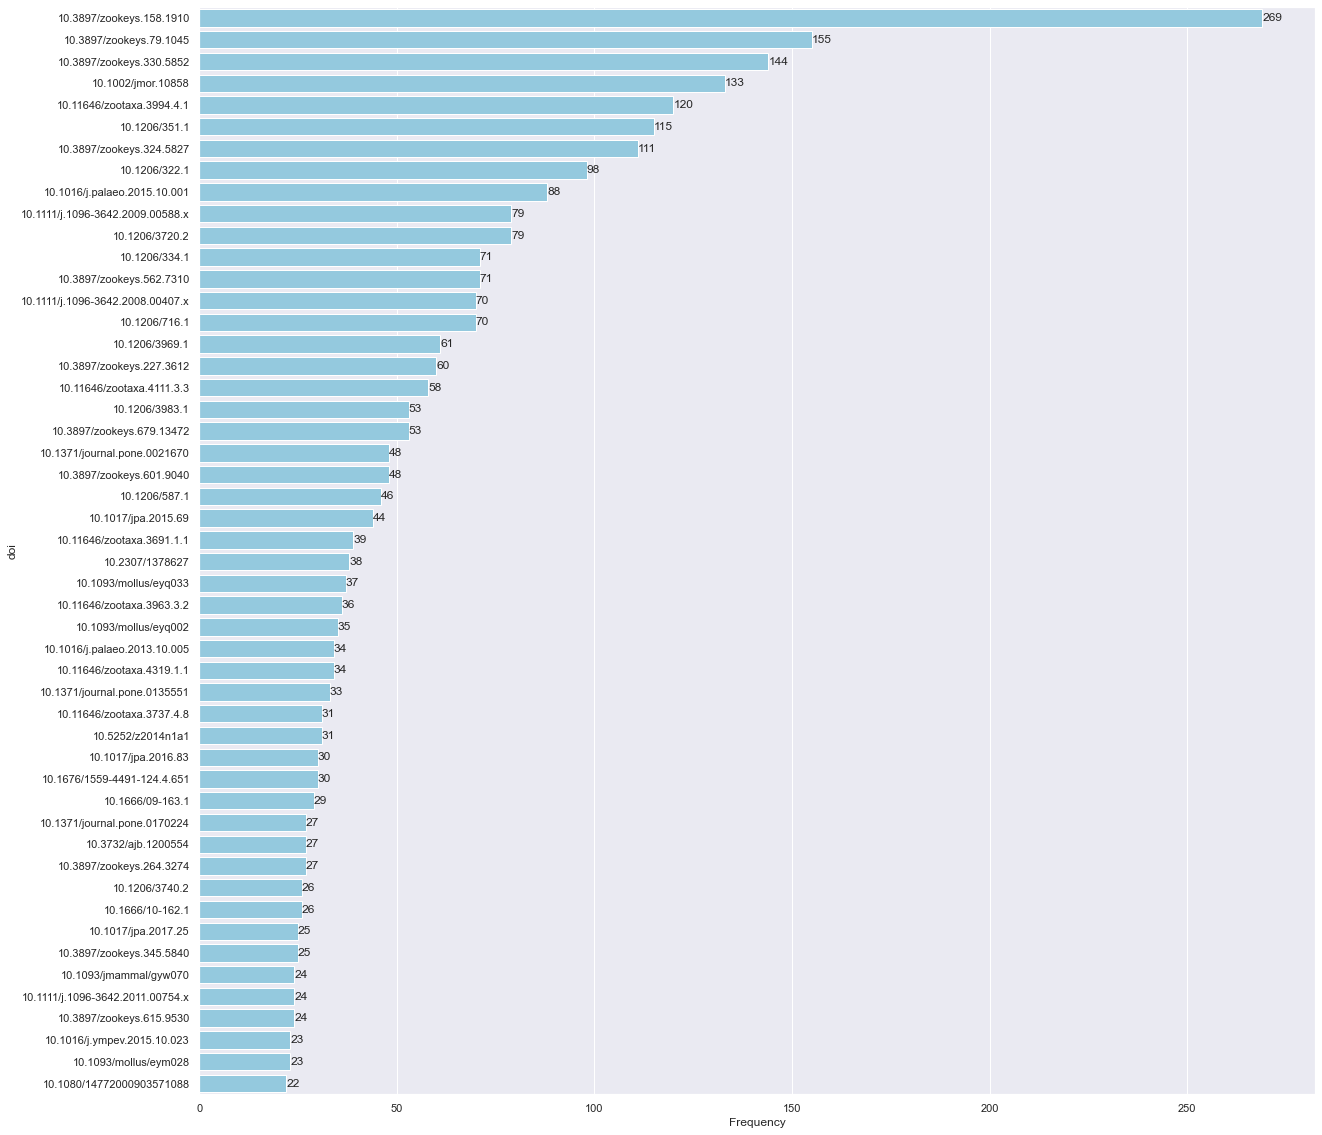

In [38]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(style="darkgrid")
ax = sns.barplot(data=top_frequency_by_paper, y='doi', x='Frequency', color='skyblue')
ax.bar_label(ax.containers[0])
plt.savefig("top_frequency_by_paper")

In [45]:
top_distinct_frequency_by_paper = pd.read_csv ('top_distinct_frequency_by_paper.csv')
top_distinct_frequency_by_paper

,doi,Frequency
0,10.3897/zookeys.158.1910,202
1,10.1002/jmor.10858,110
2,10.3897/zookeys.79.1045,99
3,10.3897/zookeys.330.5852,96
4,10.11646/zootaxa.3994.4.1,92
5,10.1206/322.1,81
6,10.1206/351.1,81
7,10.3897/zookeys.324.5827,77
8,10.3897/zookeys.562.7310,67
9,10.1206/3720.2,65


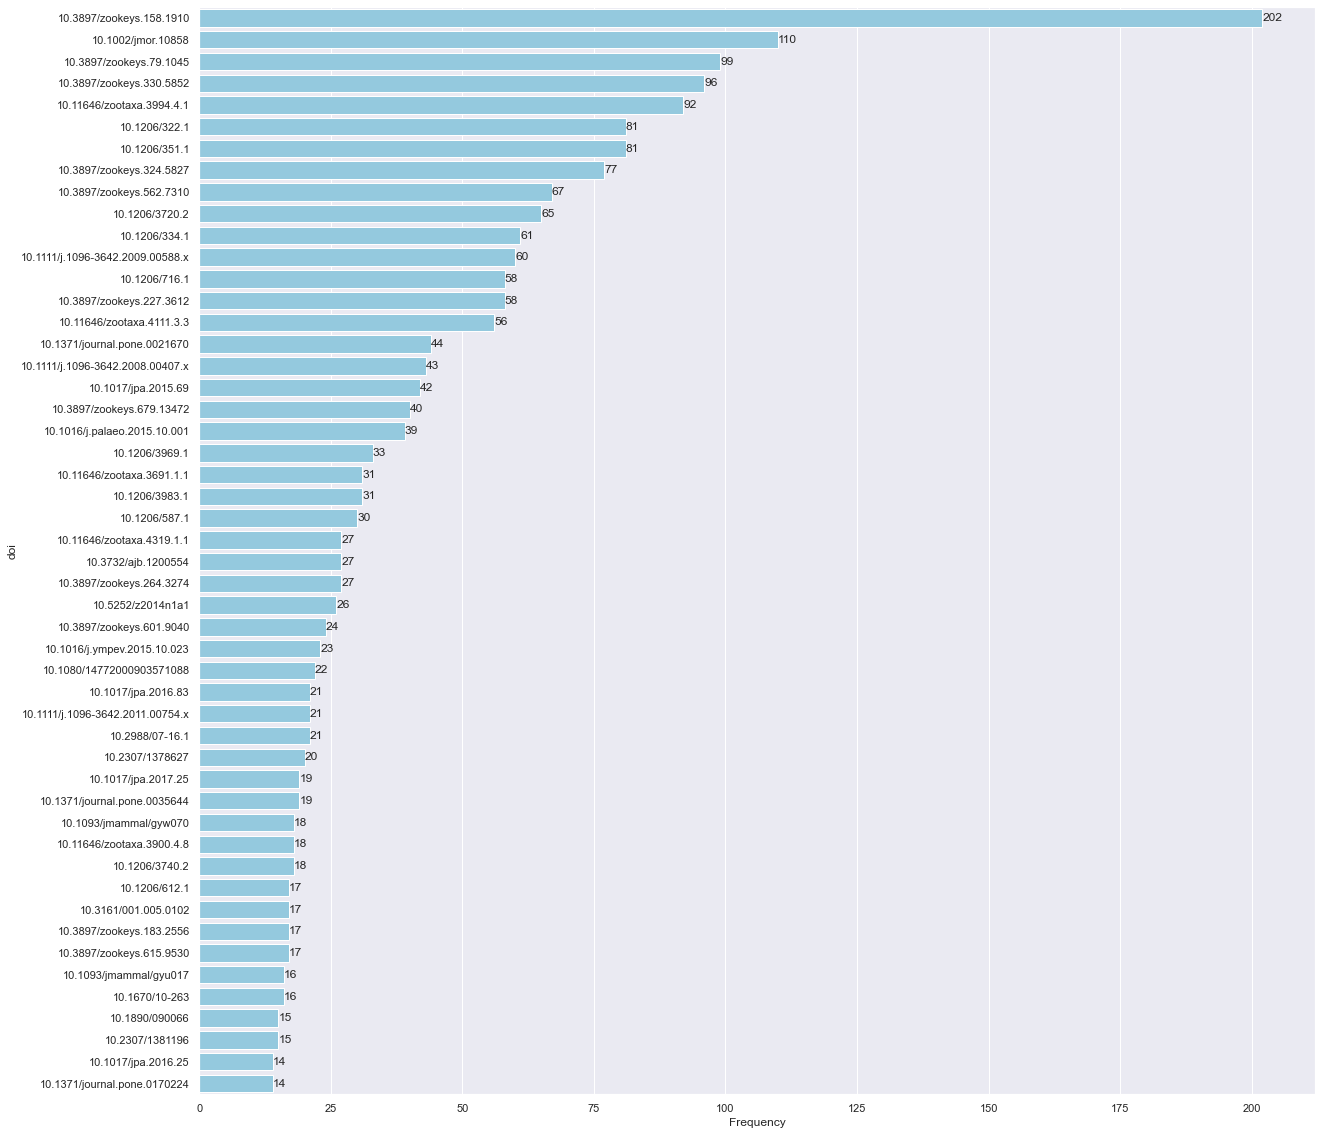

In [46]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(style="darkgrid")
ax = sns.barplot(data=top_distinct_frequency_by_paper, y='doi', x='Frequency', color='skyblue')
ax.bar_label(ax.containers[0])
plt.savefig("top_distinct_frequency_by_paper")

In [47]:
dist_unique_specs_by_paper = pd.read_csv ('dist_unique_specs_by_paper.csv')
dist_unique_specs_by_paper

,Count,numberofpapers
0,202,1
1,110,1
2,99,1
3,96,1
4,92,1
5,81,2
6,77,1
7,67,1
8,65,1
9,61,1


[Text(0, 0, '1052'),
 Text(0, 0, '52'),
 Text(0, 0, '31'),
 Text(0, 0, '30'),
 Text(0, 0, '18'),
 Text(0, 0, '8'),
 Text(0, 0, '12'),
 Text(0, 0, '8'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '10'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

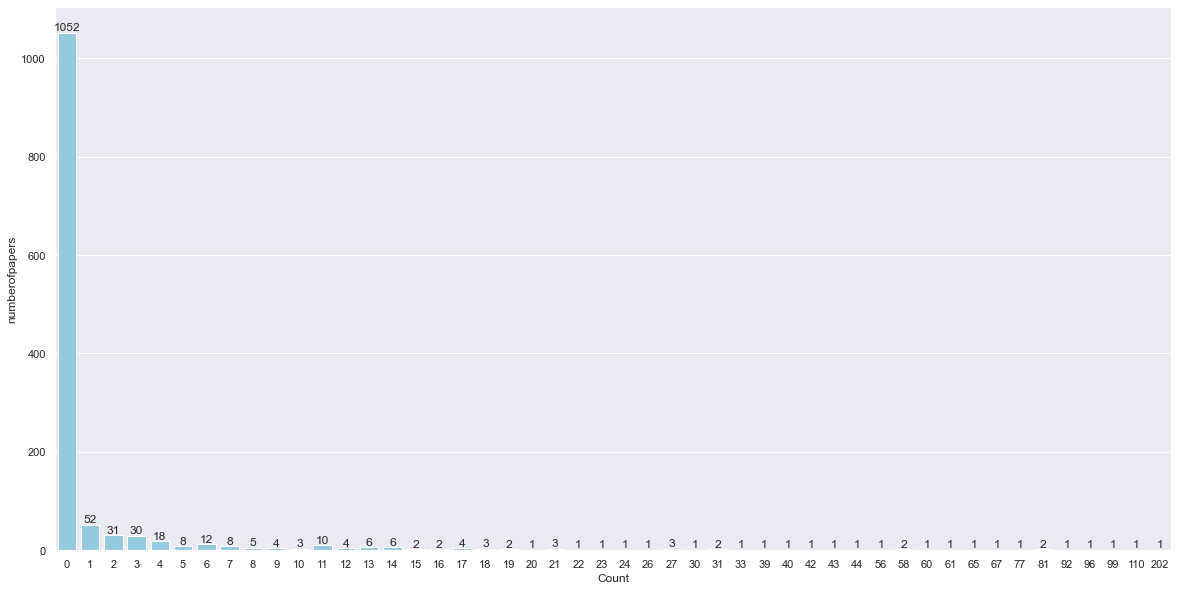

In [57]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set(style="darkgrid")
ax = sns.barplot(data=dist_unique_specs_by_paper, y='numberofpapers', x='Count', color='skyblue')
ax.bar_label(ax.containers[0])
##plt.savefig("dist_unique_specs_by_paper")

In [58]:
bottom_dist_unique_specs_by_paper = pd.read_csv ('bottom_dist_unique_specs_by_paper.csv')
bottom_dist_unique_specs_by_paper

,unique_specimen_count,number_of_papers
0,0,1052
1,1,52
2,2,31
3,3,30
4,4,18
5,5,8
6,6,12
7,7,8
8,8,5
9,9,4


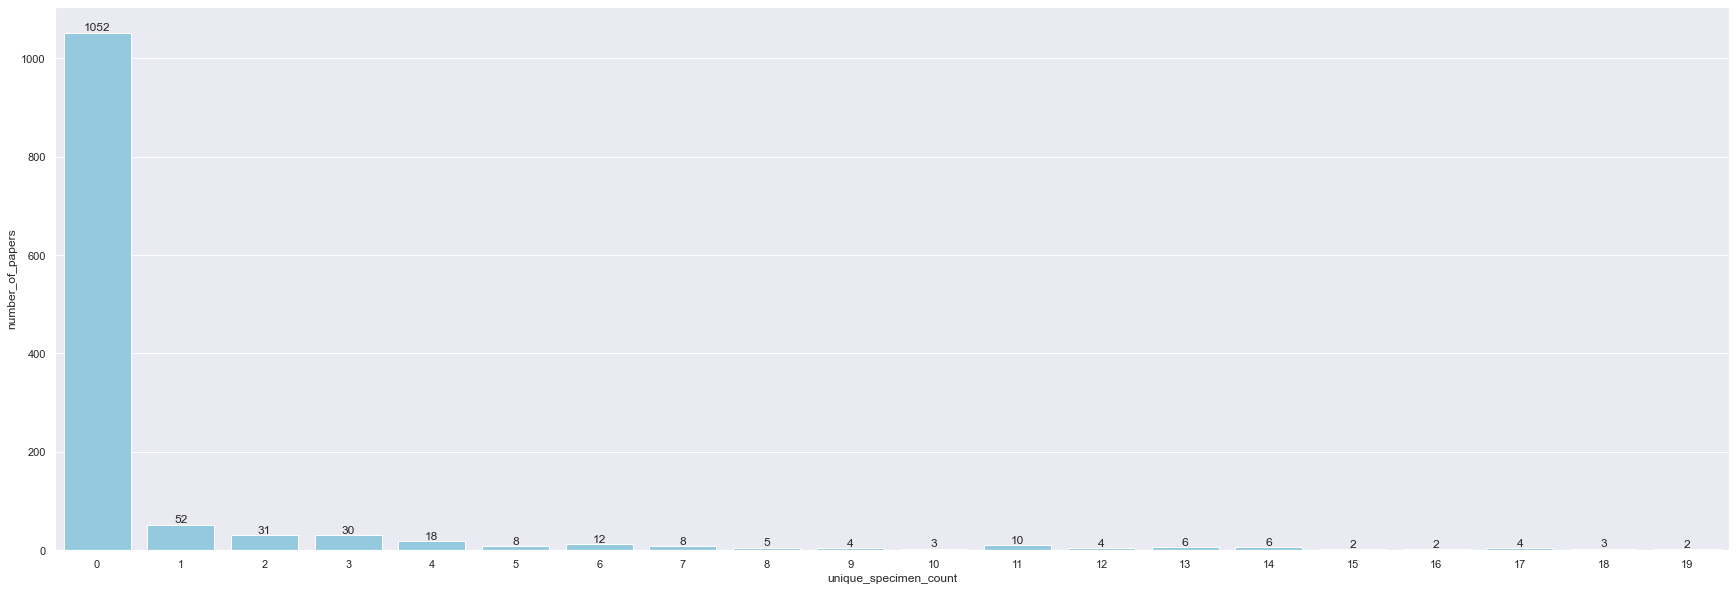

In [64]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set(style="darkgrid")
ax = sns.barplot(data=bottom_dist_unique_specs_by_paper, y='number_of_papers', x='unique_specimen_count', color='skyblue')
ax.bar_label(ax.containers[0])
plt.savefig("bottom_dist_unique_specs_by_paper")

In [68]:
citation_counts_hist = pd.read_csv ('citation_counts_bins.csv')
citation_counts_hist

,number_of_papers,unique_specimen_citations
0,1052,0
1,116,1 to 9
2,42,10 to 19
3,11,20 to 29
4,5,30 to 39
5,4,40 to 49
6,15,50+


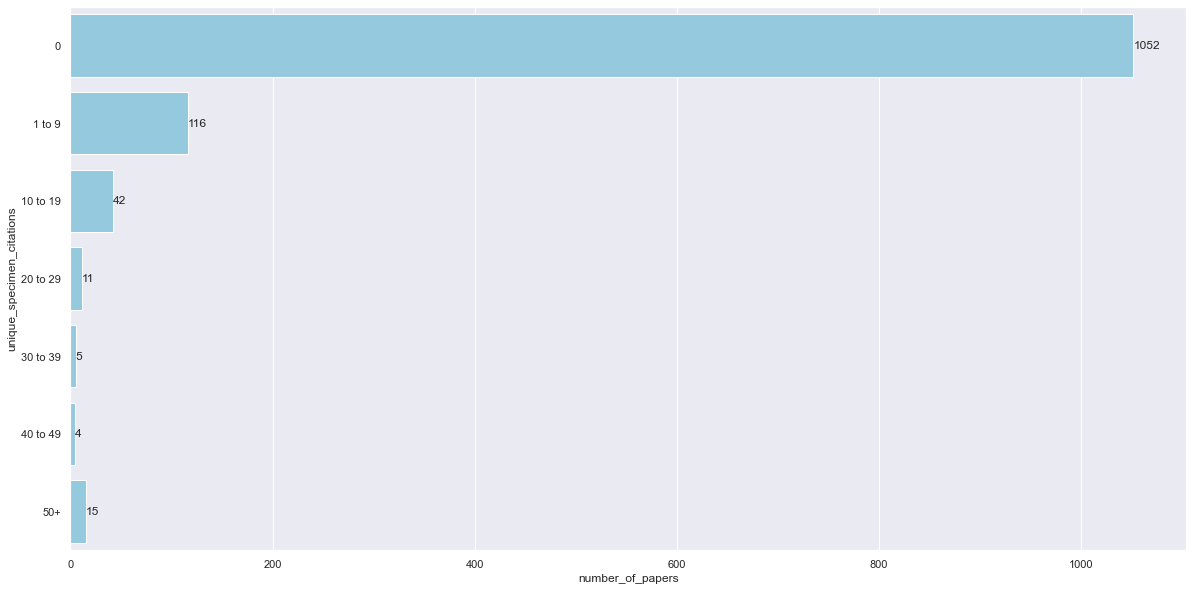

In [71]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set(style="darkgrid")
ax = sns.barplot(data=citation_counts_hist, x='number_of_papers', y='unique_specimen_citations', color='skyblue')
ax.bar_label(ax.containers[0])
plt.savefig("citation_counts_hist")